In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

##Loading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv', engine='python', on_bad_lines='skip')

In [4]:
df.sample(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
201,202,On a common refinement of Stark units and Gros...,The purpose of this paper is to formulate an...,0,0,1,0,0,0
578,579,Learning Graph Representations by Dendrograms,Hierarchical graph clustering is a common te...,1,0,0,1,0,0
809,810,A Coherent vorticity preserving eddy viscosity...,This paper introduces a new approach to Larg...,1,1,0,0,0,0
637,638,Análise comparativa de pesquisas de origens e ...,"In this paper, a comparative study was condu...",1,0,0,0,0,0
811,812,Approximating the Backbone in the Weighted Max...,The weighted Maximum Satisfiability problem ...,1,0,0,0,0,0
220,221,GANs Trained by a Two Time-Scale Update Rule C...,Generative Adversarial Networks (GANs) excel...,1,0,0,1,0,0
315,316,"Merge decompositions, two-sided Krohn-Rhodes, ...",This paper provides short proofs of two fund...,1,0,1,0,0,0
122,123,Once in a blue moon: detection of 'bluing' dur...,The first transiting planetesimal orbiting a...,0,1,0,0,0,0
271,272,Auto-Meta: Automated Gradient Based Meta Learn...,Fully automating machine learning pipelines ...,0,0,0,1,0,0
231,232,On Scalable Inference with Stochastic Gradient...,In many applications involving large dataset...,1,0,0,1,0,0


##Exploratory Data Analysis

In [5]:
df['Computer Science'].value_counts()

0    554
1    397
Name: Computer Science, dtype: int64

##Printing Info about dataframe

In [6]:
df.info

<bound method DataFrame.info of       ID                                              TITLE  \
0      1        Reconstructing Subject-Specific Effect Maps   
1      2                 Rotation Invariance Neural Network   
2      3  Spherical polyharmonics and Poisson kernels fo...   
3      4  A finite element approximation for the stochas...   
4      5  Comparative study of Discrete Wavelet Transfor...   
..   ...                                                ...   
946  947             A Macdonald refined topological vertex   
947  948  Bias voltage effects on tunneling magnetoresis...   
948  949  Listen to Your Face: Inferring Facial Action U...   
949  950  Icing on the Cake: An Easy and Quick Post-Lear...   
950  951  Minimal Effort Back Propagation for Convolutio...   

                                              ABSTRACT  Computer Science  \
0      Predictive models allow subject-specific inf...                 1   
1      Rotation invariance and translation invarian...     

##Number of sample points and columns

In [7]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
printmd("**Sample data:**")
df.head()

Number of rows in data = 951
Number of columns in data = 9




**Sample data:**

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


##Checking Missing Values

In [8]:
#checking missing_values
missing_values_check = df.isnull().sum()
print(missing_values_check)

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64


In [9]:
df.iloc[:,2:].sum(axis=1)

<ipython-input-9-6a38acb1dab8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,2:].sum(axis=1)


0      1
1      1
2      1
3      1
4      2
      ..
946    1
947    1
948    1
949    1
950    2
Length: 951, dtype: int64

##Number of articles not belonging to a certain category

In [10]:

rowSums = df.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of articles = ",len(df))
print("Number of articles without a comment = ",clean_comments_count)
print("Number of articles with labels =",(len(df)-clean_comments_count))

Total number of articles =  951
Number of articles without a comment =  0
Number of articles with labels = 951


<ipython-input-10-f2d431558386>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowSums = df.iloc[:,2:].sum(axis=1)


In [11]:
article_categories = list(df.columns.values)
categories = article_categories[3:]
print(categories)

['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']


##Calculating number of topics of articles in each category

In [12]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['article type', '--number of articles'])
df_stats

,article type,--number of articles
0,Computer Science,397
1,Physics,270
2,Mathematics,252
3,Statistics,225
4,Quantitative Biology,29
5,Quantitative Finance,10


In [13]:
categories = list(df.iloc[:,3:].columns.values)
categories

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

##Comments in each category

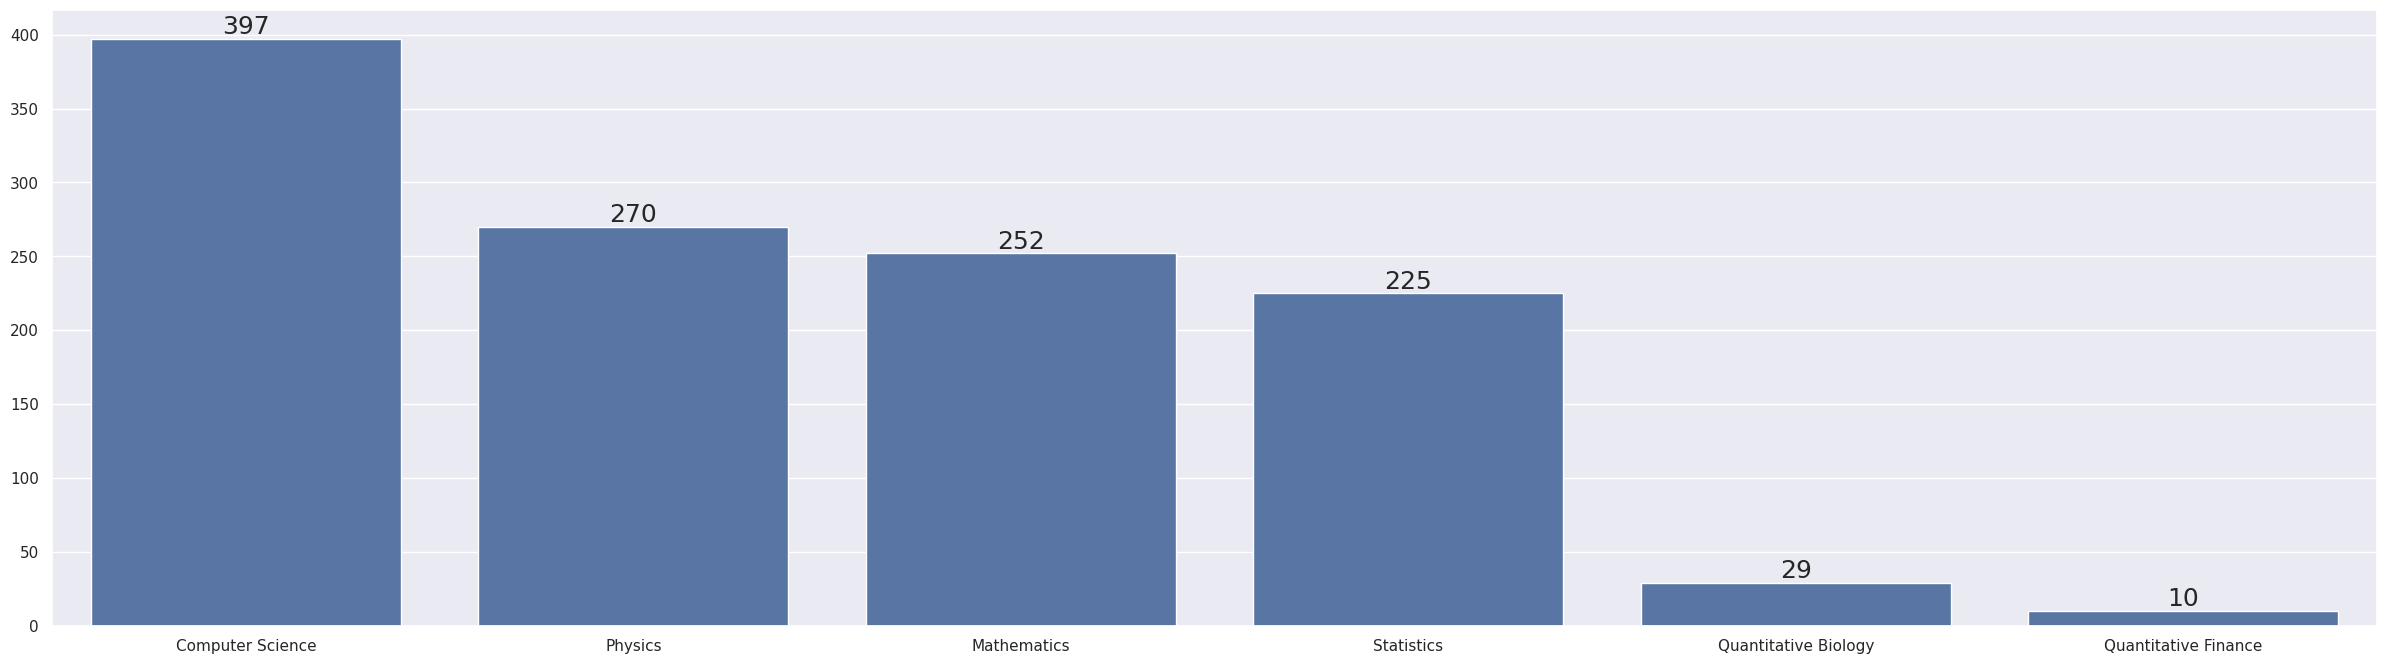

In [14]:
categories = list(df.iloc[:,3:].columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(30,8))

ax = sns.barplot(x=categories, y=df.iloc[:, 3:].sum().values)

rects = ax.patches

labels = df.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=18)
plt.show()


In [15]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts
rowSums

0      1
1      1
2      1
3      1
4      2
      ..
946    1
947    1
948    1
949    1
950    2
Length: 951, dtype: int64

In [ ]:
multiLabel_counts

1    730
2    210
3     11
dtype: int64

In [ ]:
# df.iloc[:,3:]

In [ ]:
labels = multiLabel_counts.values
labels

array([730, 210,  11])

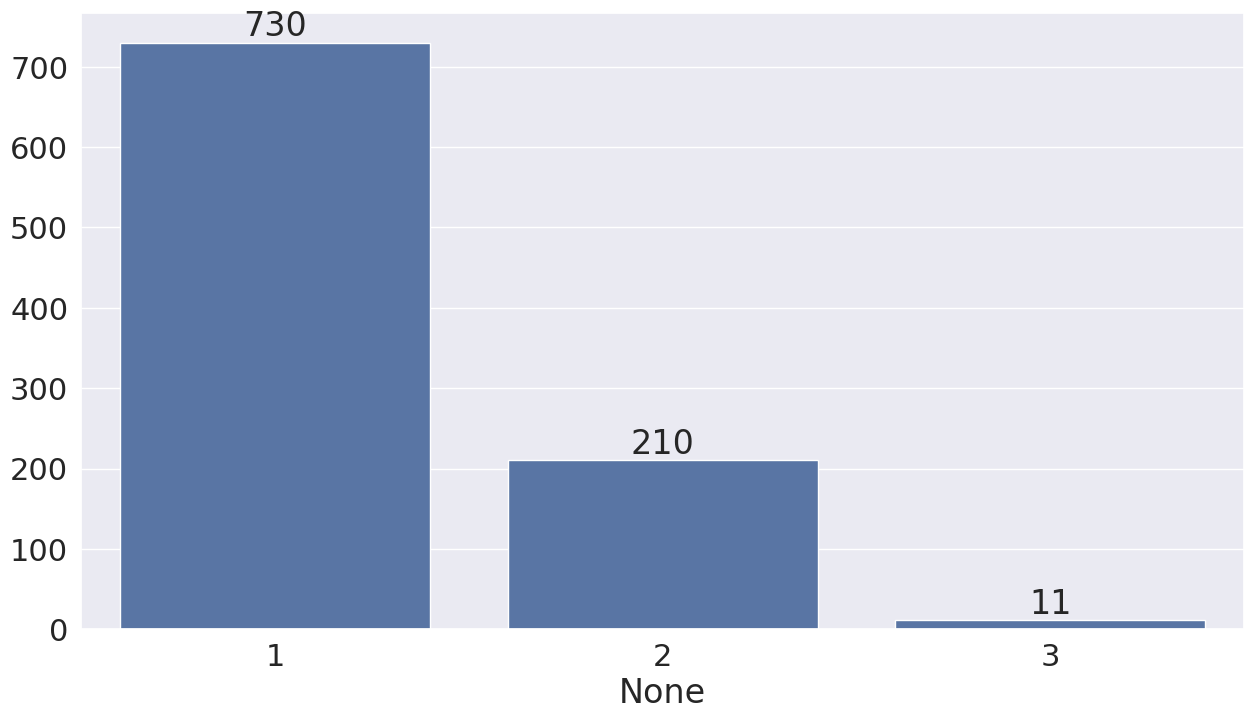

In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

# multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
# plt.title("Comments having multiple labels ")
# plt.ylabel('Number of comments', fontsize=18)
# plt.xlabel('Number of labels', fontsize=18)#adding the text labels

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

In [ ]:
df.columns.values

array(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics',
       'Mathematics', 'Statistics', 'Quantitative Biology',
       'Quantitative Finance'], dtype=object)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

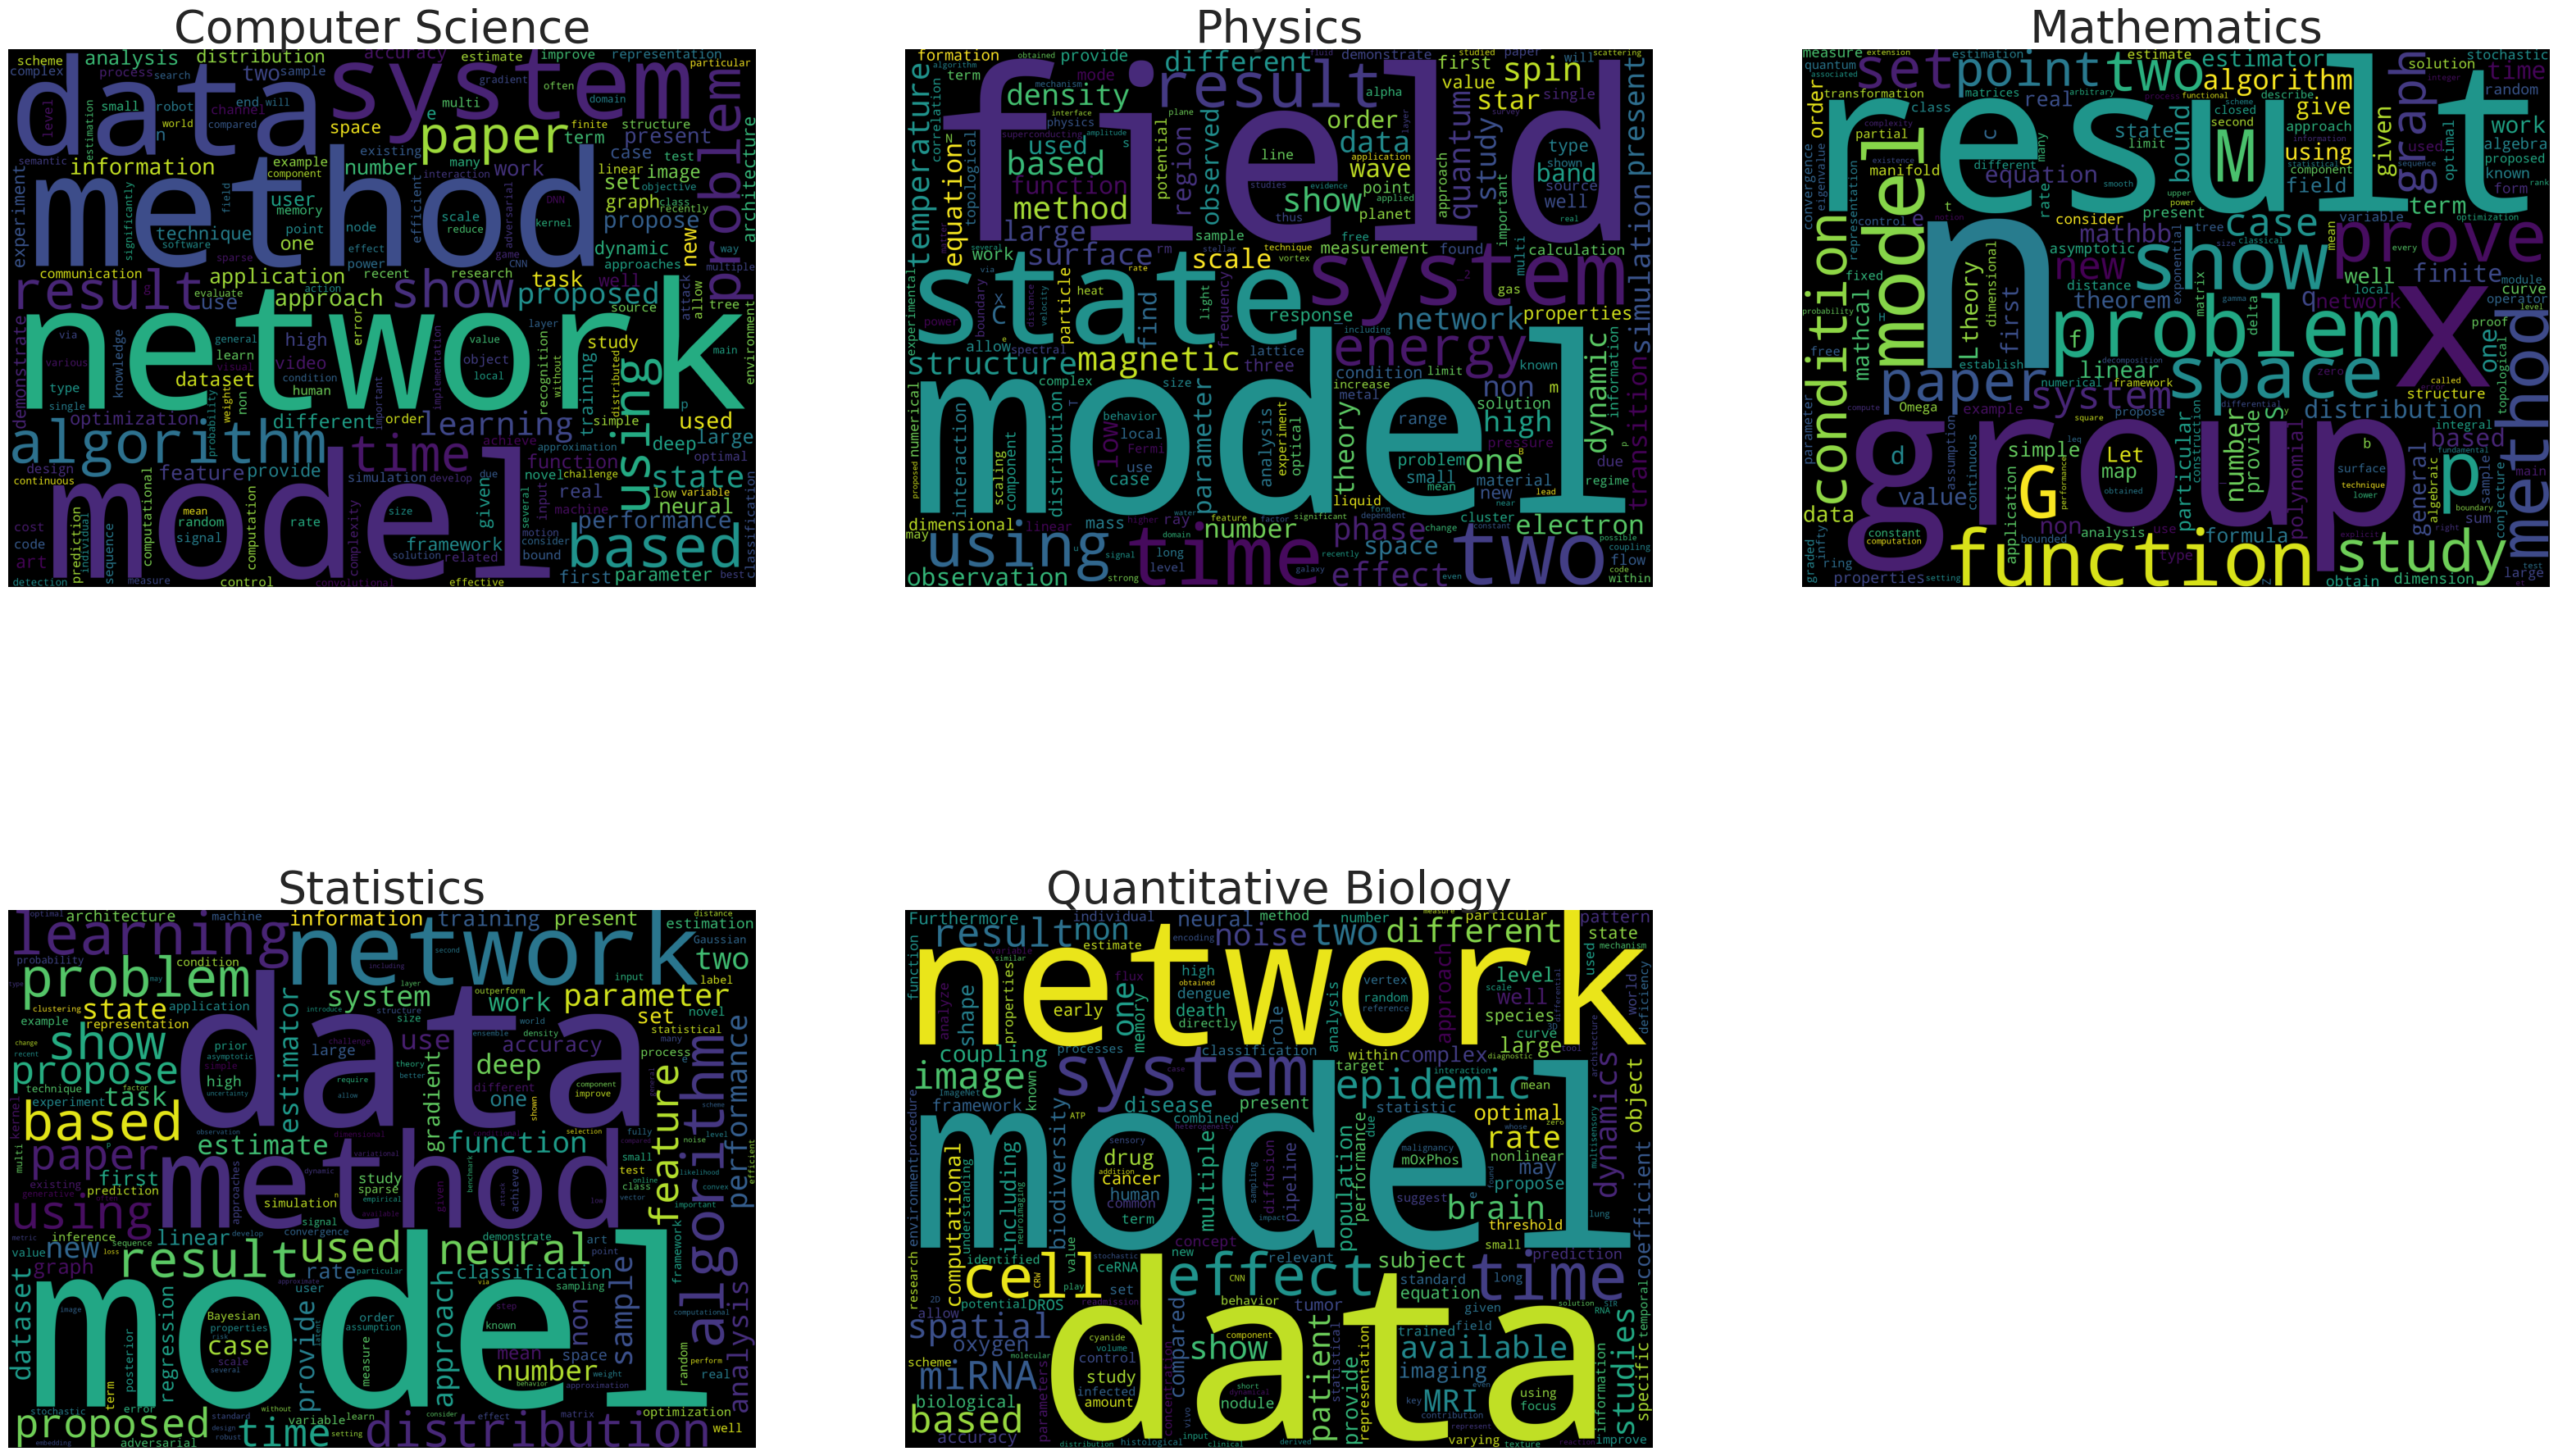

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Computer Science
subset = df[df['Computer Science']==1]
text = subset.ABSTRACT.values
cloud_CS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Computer Science",fontsize=40)
plt.imshow(cloud_CS)


subset = df[df['Physics']==1]
text = subset.ABSTRACT.values
cloud_Physics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Physics",fontsize=40)
plt.imshow(cloud_Physics)


# Mathematics', 'Statistics', 'Quantitative Biology'

subset = df[df['Mathematics']==1]
text = subset.ABSTRACT.values
cloud_Mathematics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Mathematics",fontsize=40)
plt.imshow(cloud_Mathematics)


subset = df[df['Statistics']==1]
text = subset.ABSTRACT.values
cloud_Statistics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Statistics",fontsize=40)
plt.imshow(cloud_Statistics)

subset = df[df['Quantitative Biology']==1]
text = subset.ABSTRACT.values
cloud_Quantitative_Biology = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Quantitative Biology",fontsize=40)
plt.imshow(cloud_Quantitative_Biology)



##Data Pre-Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Cleaning and standardizing data

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


In [ ]:
df.head(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0


In [ ]:
df['TITLE'] = df['TITLE'].str.lower()
df['TITLE'] = df['TITLE'].apply(cleanHtml)
df['TITLE'] = df['TITLE'].apply(cleanPunc)
df['TITLE'] = df['TITLE'].apply(keepAlpha)
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,reconstructing subject specific effect maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,rotation invariance neural network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,spherical polyharmonics and poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,a finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,comparative study of discrete wavelet transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
df['ABSTRACT'] = df['ABSTRACT'].str.lower()
df['ABSTRACT'] = df['ABSTRACT'].apply(cleanHtml)
df['ABSTRACT'] = df['ABSTRACT'].apply(cleanPunc)
df['ABSTRACT'] = df['ABSTRACT'].apply(keepAlpha)
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0
1,2,rotation invariance neural network,rotation invariance and translation invariance...,1,0,0,0,0,0
2,3,spherical polyharmonics and poisson kernels fo...,we introduce and develop the notion of spheric...,0,0,1,0,0,0
3,4,a finite element approximation for the stochas...,the stochastic landau lifshitz gilbert llg equ...,0,0,1,0,0,0
4,5,comparative study of discrete wavelet transfor...,fourier transform infra red ftir spectra of sa...,1,0,0,1,0,0


##Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df['TITLE'] = df['TITLE'].apply(removeStopWords)
df['ABSTRACT'] = df['ABSTRACT'].apply(removeStopWords)

df.head()


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0
1,2,rotation invariance neural network,rotation invariance translation invariance g...,1,0,0,0,0,0
2,3,spherical polyharmonics poisson kernels poly...,introduce develop notion spherical polyhar...,0,0,1,0,0,0
3,4,finite element approximation stochastic max...,stochastic landau lifshitz gilbert llg equati...,0,0,1,0,0,0
4,5,comparative study discrete wavelet transforms...,fourier transform infra red ftir spectra samp...,1,0,0,1,0,0


##Stemming

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['TITLE'] = df['TITLE'].apply(stemming)
df['ABSTRACT'] = df['ABSTRACT'].apply(stemming)
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,reconstruct subject specif effect map,predict model allow subject specif infer analy...,1,0,0,0,0,0
1,2,rotat invari neural network,rotat invari translat invari great valu imag r...,1,0,0,0,0,0
2,3,spheric polyharmon poisson kernel polyharmon f...,introduc develop notion spheric polyharmon nat...,0,0,1,0,0,0
3,4,finit element approxim stochast maxwel landau ...,stochast landau lifshitz gilbert llg equat cou...,0,0,1,0,0,0
4,5,compar studi discret wavelet transform wavelet...,fourier transform infra red ftir spectra sampl...,1,0,0,1,0,0


In [ ]:
df.head(1)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,reconstruct subject specif effect map,predict model allow subject specif infer analy...,1,0,0,0,0,0
